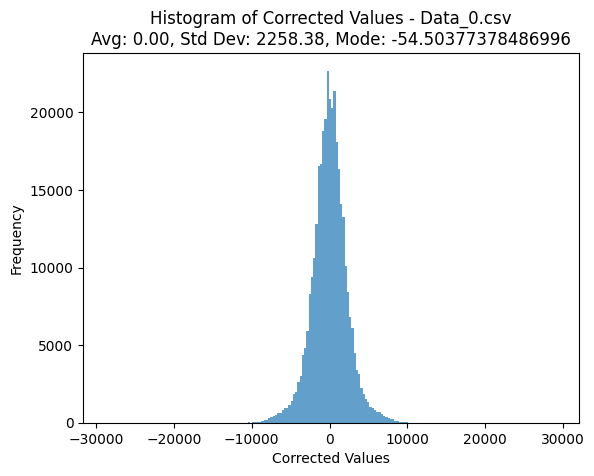

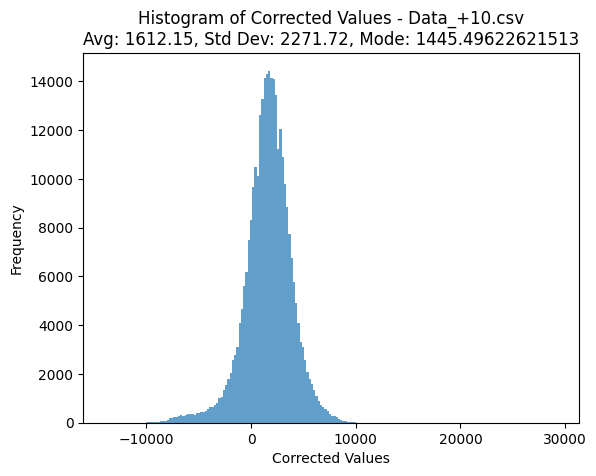

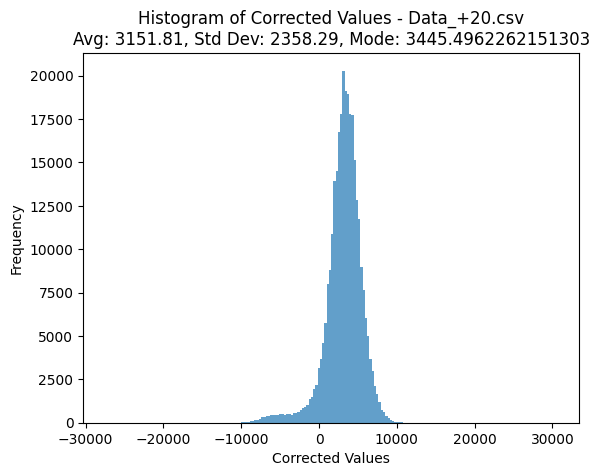

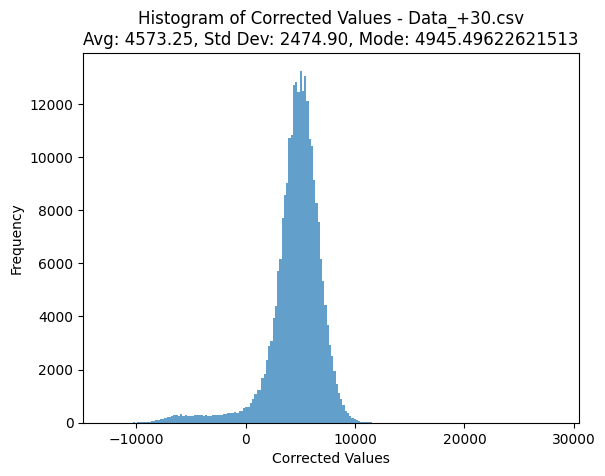

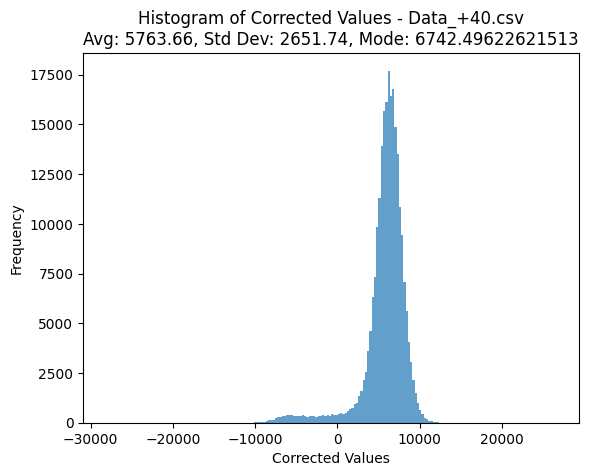

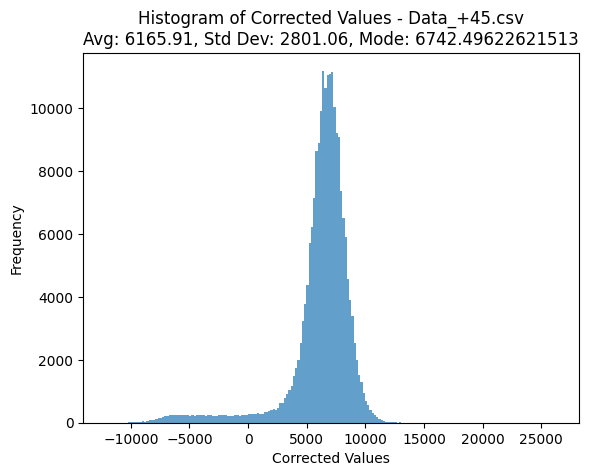

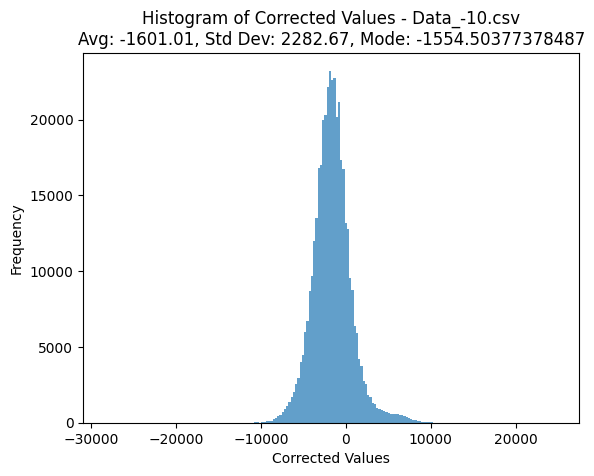

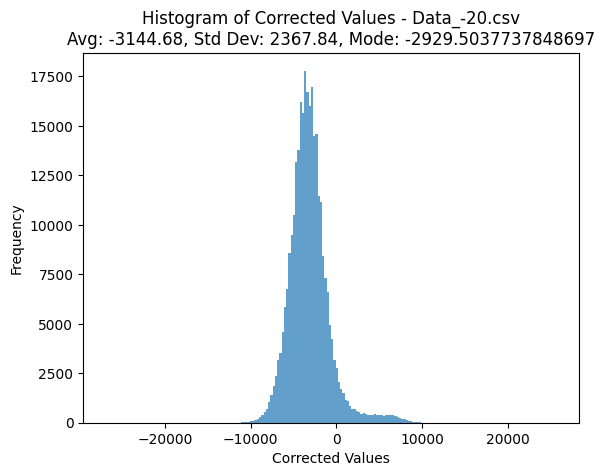

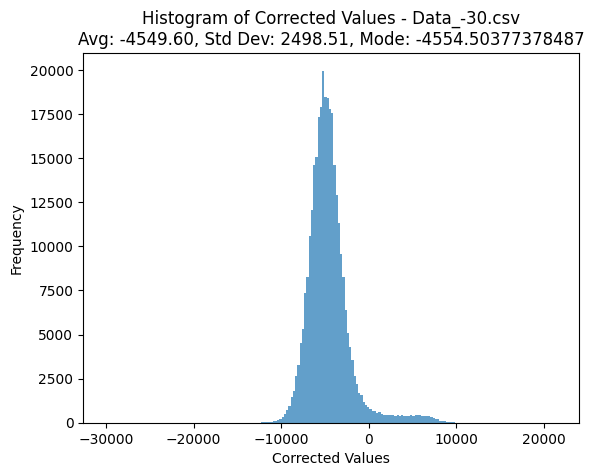

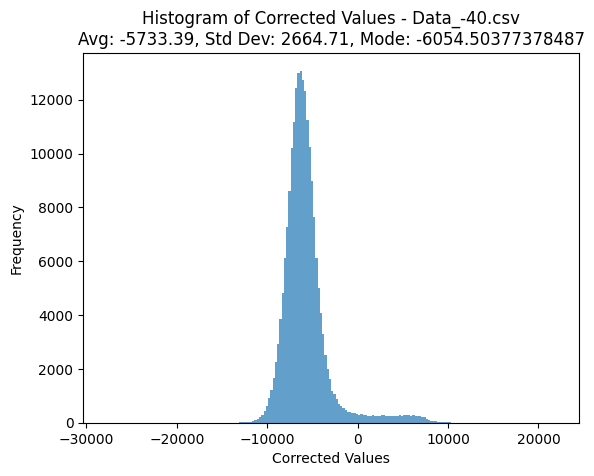

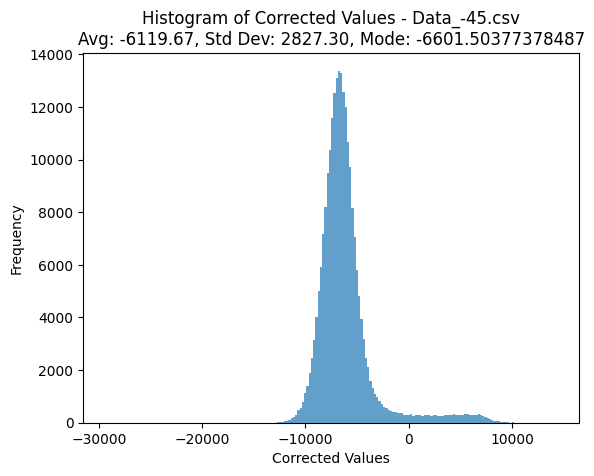

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv", "Data_+45.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv", "Data_-45.csv"
]

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Extract the 'corrected' column
        corrected_values = df['corrected']
        
        # Calculate statistics
        avg = statistics.mean(corrected_values)
        std_dev = statistics.stdev(corrected_values)
        mode = statistics.mode(corrected_values)
        
        # Create a histogram
        plt.hist(corrected_values, bins=200, alpha=0.7)
        
        # Add labels and title
        plt.xlabel('Corrected Values')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of Corrected Values - {file_name}\n'
                  f'Avg: {avg:.2f}, Std Dev: {std_dev:.2f}, Mode: {mode}')
        
        # Show and save the plot
        output_filename = f'histogram_{file_name}.png'  # Define the output filename
        plt.savefig(output_filename)  # Save the plot to a file
        plt.show()  # Show the plot
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")


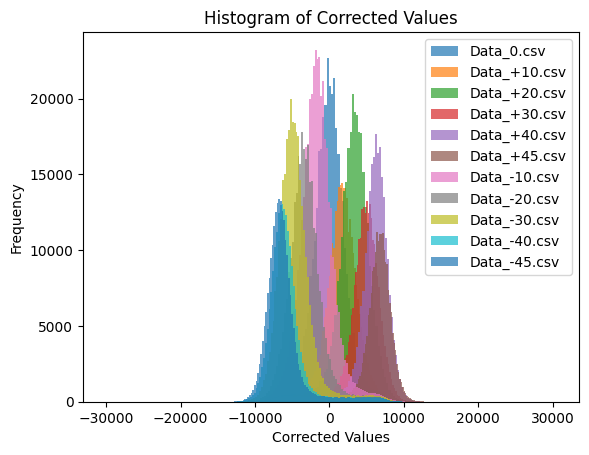

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv", "Data_+45.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv", "Data_-45.csv"
]

# Create a new figure
plt.figure()

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Extract the 'corrected' column
        corrected_values = df['corrected']
        
        # Calculate statistics
        avg = statistics.mean(corrected_values)
        std_dev = statistics.stdev(corrected_values)
        mode = statistics.mode(corrected_values)
        
        # Create a histogram with a specified color
        plt.hist(corrected_values, bins=200, alpha=0.7, label=file_name)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Add labels and title
plt.xlabel('Corrected Values')
plt.ylabel('Frequency')
plt.title('Histogram of Corrected Values')
plt.legend()  # Add legend to distinguish files

# Show and save the plot
plt.savefig('histogram_all_files.png')  # Save the plot to a file
plt.show()  # Show the plot


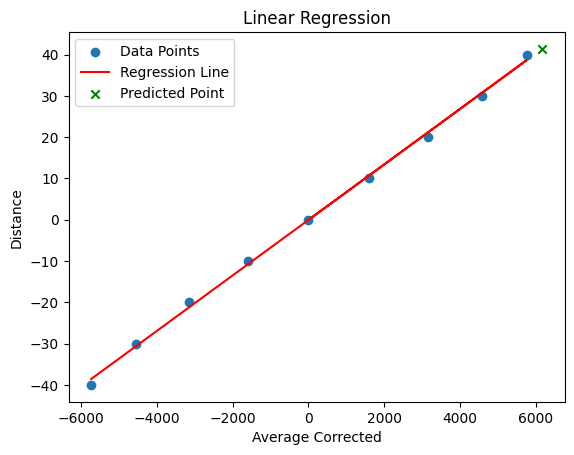

Linear Regression Results:
Slope: 0.0067196564
Intercept: -0.0539094813
R-squared value: 0.9985736080
P-value: 0.0000000000
Standard error: 0.0000959903
------------------------------
Test file: Data_+45.csv
Test Average Corrected: 6165.9050284768
Predicted Dist: 41.3788534475

Linear Regression Equation:
Distance = 0.0067196564 * Average Corrected + -0.0539094813


In [5]:
import pandas as pd
from scipy import stats
import re
import numpy as np
import matplotlib.pyplot as plt

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv"
]

# Define a function to extract the 'dist' value from the file name
def extract_dist(file_name):
    match = re.search(r'([-+]?\d+)', file_name)
    if match:
        return int(match.group())
    return None

# Create empty lists to store the data for regression
independent_vars = []
dependent_vars = []

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Calculate statistics
        avg_corrected = df['corrected'].mean()
        dist = extract_dist(file_name)
        
        # Append data for regression
        independent_vars.append(avg_corrected)
        dependent_vars.append(dist)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(independent_vars, dependent_vars)

# Test using Data_+45
test_file_name = "Data_+45.csv"
test_df = pd.read_csv(test_file_name)
test_avg_corrected = test_df['corrected'].mean()
predicted_dist = slope * test_avg_corrected + intercept

# Plot the data points, regression line, and predicted point
plt.scatter(independent_vars, dependent_vars, label='Data Points')
plt.plot(independent_vars, slope * np.array(independent_vars) + intercept, color='red', label='Regression Line')
plt.scatter(test_avg_corrected, predicted_dist, color='green', marker='x', label='Predicted Point')
plt.xlabel('Average Corrected')
plt.ylabel('Distance')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print regression results and prediction for the test file
print("Linear Regression Results:")
print(f"Slope: {slope:.10f}")
print(f"Intercept: {intercept:.10f}")
print(f"R-squared value: {r_value**2:.10f}")
print(f"P-value: {p_value:.10f}")
print(f"Standard error: {std_err:.10f}")
print("-" * 30)
print(f"Test file: {test_file_name}")
print(f"Test Average Corrected: {test_avg_corrected:.10f}")
print(f"Predicted Dist: {predicted_dist:.10f}")

# Print the linear regression equation
print("\nLinear Regression Equation:")
print(f"Distance = {slope:.10f} * Average Corrected + {intercept:.10f}")


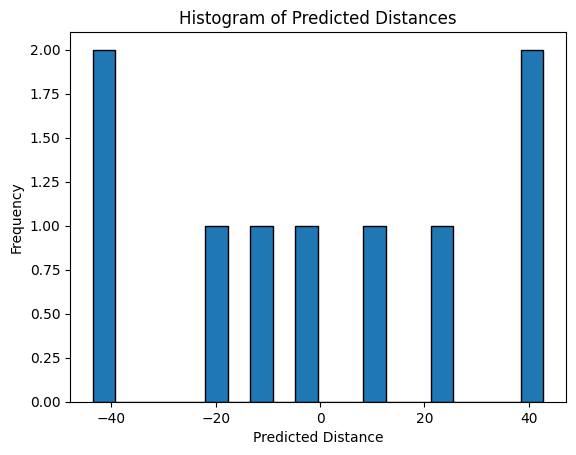

In [4]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+40.csv", "Data_+45.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-40.csv", "Data_-45.csv",
]

# Create empty lists to store the data for regression
independent_vars = []
dependent_vars = []

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)

        # Calculate statistics
        mode_corrected = df['corrected'].mode().iloc[0]
        dist = extract_dist(file_name)

        # Append data for regression
        independent_vars.append(mode_corrected)
        dependent_vars.append(dist)

    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Perform linear regression
slope, intercept, _, _, _ = stats.linregress(independent_vars, dependent_vars)

# Calculate predicted distances for all files
predicted_distances = [slope * mode_corrected + intercept for mode_corrected in independent_vars]

# Plot histogram of predicted distances
plt.hist(predicted_distances, bins=20, edgecolor='black')
plt.xlabel('Predicted Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Distances')
plt.show()


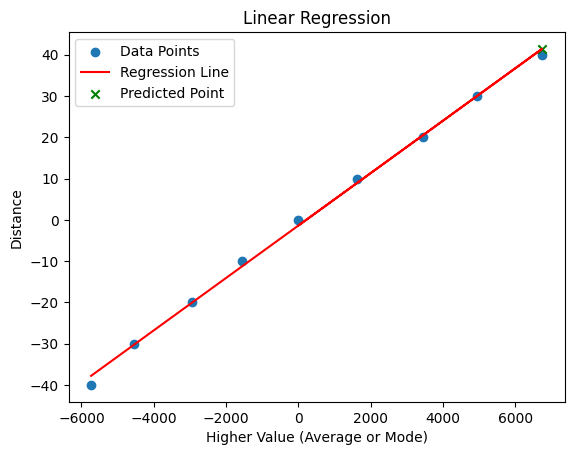

Linear Regression Results:
Slope: 0.01
Intercept: -1.40
R-squared value: 1.00
P-value: 0.00
Standard error: 0.00
------------------------------
Test file: Data_+45.csv
Test Higher Value: 6742.50
Predicted Dist: 41.42


In [19]:
import pandas as pd
from scipy import stats
import re
import matplotlib.pyplot as plt
import numpy as np

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv"
]

# Define a function to extract the 'dist' value from the file name
def extract_dist(file_name):
    match = re.search(r'([-+]?\d+)', file_name)
    if match:
        return int(match.group())
    return None

# Create empty lists to store the data for regression
independent_vars = []
dependent_vars = []

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Calculate statistics
        avg_corrected = df['corrected'].mean()
        mode_corrected = df['corrected'].mode().iloc[0]
        higher_value = max(avg_corrected, mode_corrected)
        dist = extract_dist(file_name)
        
        # Append data for regression
        independent_vars.append(higher_value)
        dependent_vars.append(dist)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(independent_vars, dependent_vars)

# Test using Data_+45
test_file_name = "Data_+45.csv"
test_df = pd.read_csv(test_file_name)
test_avg_corrected = test_df['corrected'].mean()
test_mode_corrected = test_df['corrected'].mode().iloc[0]
test_higher_value = max(test_avg_corrected, test_mode_corrected)
predicted_dist = slope * test_higher_value + intercept

# Plot the data points, regression line, and predicted point
plt.scatter(independent_vars, dependent_vars, label='Data Points')
plt.plot(independent_vars, slope * np.array(independent_vars) + intercept, color='red', label='Regression Line')
plt.scatter(test_higher_value, predicted_dist, color='green', marker='x', label='Predicted Point')
plt.xlabel('Higher Value (Average or Mode)')
plt.ylabel('Distance')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print regression results and prediction for the test file
print("Linear Regression Results:")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared value: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Standard error: {std_err:.2f}")
print("-" * 30)
print(f"Test file: {test_file_name}")
print(f"Test Higher Value: {test_higher_value:.2f}")
print(f"Predicted Dist: {predicted_dist:.2f}")


C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Python\Python311\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


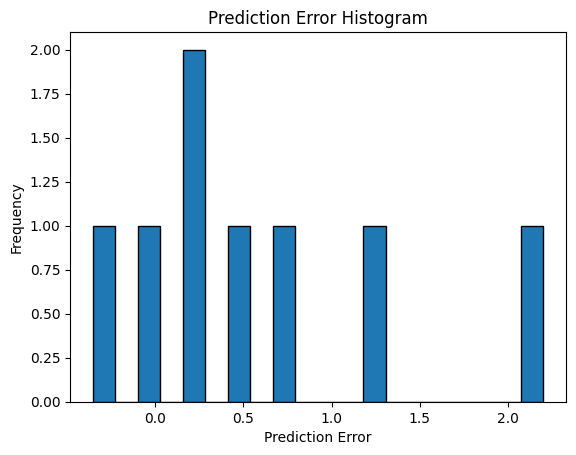

Linear Regression Results:
Slope: 0.01
Intercept: -1.40
------------------------------
Sigma (Standard Deviation of Prediction Errors): nan


In [11]:
import pandas as pd
import numpy as np
import re

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv"
]

# Define a function to extract the 'dist' value from the file name
def extract_dist(file_name):
    match = re.search(r'([-+]?\d+)', file_name)
    if match:
        return int(match.group())
    return None

# Create empty lists to store the data for regression
independent_vars = []
dependent_vars = []

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Calculate statistics
        avg_corrected = df['corrected'].mean()
        mode_corrected = df['corrected'].mode().iloc[0]
        higher_value = max(avg_corrected, mode_corrected)
        std_dev_corrected = df['corrected'].std()
        dist = extract_dist(file_name)
        
        # Append data for regression
        independent_vars.append([1, higher_value, std_dev_corrected])  # Adding a constant term
        dependent_vars.append(dist)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Perform multiple regression using np.linalg.lstsq
coefficients, residuals, rank, singular_values = np.linalg.lstsq(independent_vars, dependent_vars, rcond=None)

# Test using Data_+45
test_file_name = "Data_+45.csv"
test_df = pd.read_csv(test_file_name)
test_avg_corrected = test_df['corrected'].mean()
test_mode_corrected = test_df['corrected'].mode().iloc[0]
test_higher_value = max(test_avg_corrected, test_mode_corrected)
test_std_dev_corrected = test_df['corrected'].std()
test_input = [1, test_higher_value, test_std_dev_corrected]
predicted_dist = np.dot(test_input, coefficients)

# Print regression results and prediction for the test file
print("Multiple Regression Results:")
print(f"Coefficients: {coefficients}")
print("-" * 30)
print(f"Test file: {test_file_name}")
print(f"Test Higher Value: {test_higher_value:.2f}")
print(f"Test Std Dev Corrected: {test_std_dev_corrected:.2f}")
print(f"Predicted Dist: {predicted_dist:.2f}")


Multiple Regression Results:
Coefficients: [ 1.57561041e+01  6.34846000e-03 -7.07169113e-03]
------------------------------
Test file: Data_+45.csv
Test Higher Value: 6742.50
Test Std Dev Corrected: 2801.06
Predicted Dist: 38.75


In [12]:
import pandas as pd
import numpy as np
import re

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv"
]

# Define a function to extract the 'dist' value from the file name
def extract_dist(file_name):
    match = re.search(r'([-+]?\d+)', file_name)
    if match:
        return int(match.group())
    return None

# Create empty lists to store the data for regression
independent_vars = []
dependent_vars = []

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Calculate statistics
        avg_corrected = df['corrected'].mean()
        mode_corrected = df['corrected'].mode().iloc[0]
        higher_value = max(avg_corrected, mode_corrected)
        std_dev_corrected = df['corrected'].std()
        dist = extract_dist(file_name)
        
        # Append data for regression
        independent_vars.append([higher_value, std_dev_corrected])
        dependent_vars.append(dist)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Convert to numpy arrays
X = np.array(independent_vars)
y = np.array(dependent_vars)

# Perform polynomial regression
poly = PolynomialFeatures(degree=2)  # You can adjust the degree of the polynomial
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Test using Data_+45
test_file_name = "Data_+45.csv"
test_df = pd.read_csv(test_file_name)
test_avg_corrected = test_df['corrected'].mean()
test_mode_corrected = test_df['corrected'].mode().iloc[0]
test_higher_value = max(test_avg_corrected, test_mode_corrected)
test_std_dev_corrected = test_df['corrected'].std()
test_input = np.array([[test_higher_value, test_std_dev_corrected]])
test_input_poly = poly.transform(test_input)
predicted_dist = model.predict(test_input_poly)

# Print regression results and prediction for the test file
print("Polynomial Regression Results:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print("-" * 30)
print(f"Test file: {test_file_name}")
print(f"Test Higher Value: {test_higher_value:.2f}")
print(f"Test Std Dev Corrected: {test_std_dev_corrected:.2f}")
print(f"Predicted Dist: {predicted_dist[0]:.2f}")


Polynomial Regression Results:
Intercept: 107.80427962955902
Coefficients: [ 0.00000000e+00  7.09109565e-03 -4.31546515e-02  4.83294479e-07
 -4.57392127e-07 -2.10882323e-06]
------------------------------
Test file: Data_+45.csv
Test Higher Value: 6742.50
Test Std Dev Corrected: 2801.06
Predicted Dist: 31.52


In [14]:
import pandas as pd
import numpy as np
import re

from sklearn.linear_model import LinearRegression

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv"
]

# Define a function to extract the 'dist' value from the file name
def extract_dist(file_name):
    match = re.search(r'([-+]?\d+)', file_name)
    if match:
        return int(match.group())
    return None

# Create empty lists to store the data for regression
independent_vars = []
dependent_vars = []

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Calculate statistics
        corrected = df['corrected'].mean()
        std_dev_corrected = df['corrected'].std()
        dist = extract_dist(file_name)
        
        # Append data for regression
        independent_vars.append([corrected, np.log(std_dev_corrected)])  # Using the log of std deviation
        dependent_vars.append(dist)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Convert to numpy arrays
X = np.array(independent_vars)
y = np.array(dependent_vars)

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Test using Data_+45
test_file_name = "Data_+45.csv"
test_df = pd.read_csv(test_file_name)
test_corrected = test_df['corrected'].mean()
test_std_dev_corrected = test_df['corrected'].std()
test_input = np.array([[test_corrected, np.log(test_std_dev_corrected)]])
predicted_dist = model.predict(test_input)

# Print regression results and prediction for the test file
print("Linear Regression Results:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print("-" * 30)
print(f"Test file: {test_file_name}")
print(f"Test Corrected: {test_corrected:.2f}")
print(f"Test Std Dev Corrected: {test_std_dev_corrected:.2f}")
print(f"Predicted Dist: {predicted_dist[0]:.2f}")


Linear Regression Results:
Intercept: 2.2382704644211007
Coefficients: [ 0.00671946 -0.29417304]
------------------------------
Test file: Data_+45.csv
Test Corrected: 6165.91
Test Std Dev Corrected: 2801.06
Predicted Dist: 41.33


In [15]:
import pandas as pd
import numpy as np
import re

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv"
]

# Define a function to extract the 'dist' value from the file name
def extract_dist(file_name):
    match = re.search(r'([-+]?\d+)', file_name)
    if match:
        return int(match.group())
    return None

# Create empty lists to store the data for regression
independent_vars = []
dependent_vars = []

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Calculate statistics
        corrected = df['corrected'].mean()
        std_dev_corrected = df['corrected'].std()
        dist = extract_dist(file_name)
        
        # Append data for regression
        independent_vars.append([corrected, std_dev_corrected ** 2])  # Using the square of std deviation
        dependent_vars.append(dist)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Convert to numpy arrays
X = np.array(independent_vars)
y = np.array(dependent_vars)

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Test using Data_+45
test_file_name = "Data_+45.csv"
test_df = pd.read_csv(test_file_name)
test_corrected = test_df['corrected'].mean()
test_std_dev_corrected = test_df['corrected'].std()
test_input = np.array([[test_corrected, test_std_dev_corrected ** 2]])
predicted_dist = model.predict(test_input)

# Print regression results and prediction for the test file
print("Linear Regression Results:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print("-" * 30)
print(f"Test file: {test_file_name}")
print(f"Test Corrected: {test_corrected:.2f}")
print(f"Test Std Dev Corrected: {test_std_dev_corrected:.2f}")
print(f"Predicted Dist: {predicted_dist[0]:.2f}")


Linear Regression Results:
Intercept: 0.11780584317442183
Coefficients: [ 6.71941028e-03 -2.90821132e-08]
------------------------------
Test file: Data_+45.csv
Test Corrected: 6165.91
Test Std Dev Corrected: 2801.06
Predicted Dist: 41.32


In [17]:
import pandas as pd
import numpy as np
import re

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# List of file names
file_names = [
    "Data_0.csv", "Data_+10.csv", "Data_+20.csv", "Data_+30.csv", "Data_+40.csv",
    "Data_-10.csv", "Data_-20.csv", "Data_-30.csv", "Data_-40.csv"
]

# Define a function to extract the 'dist' value from the file name
def extract_dist(file_name):
    match = re.search(r'([-+]?\d+)', file_name)
    if match:
        return int(match.group())
    return None

# Create empty lists to store the data for regression
independent_vars = []
dependent_vars = []

# Loop through each file
for file_name in file_names:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_name)
        
        # Calculate statistics
        corrected = df['corrected'].mean()
        std_dev_corrected = df['corrected'].std()
        dist = extract_dist(file_name)
        
        # Append data for regression
        independent_vars.append([corrected, std_dev_corrected ** 2])  # Using the square of std deviation
        dependent_vars.append(dist)
        
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Convert to numpy arrays
X = np.array(independent_vars)
y = np.array(dependent_vars)

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Test using Data_+45
test_file_name = "Data_+45.csv"
test_df = pd.read_csv(test_file_name)
test_corrected = test_df['corrected'].mean()
test_std_dev_corrected = test_df['corrected'].std()
test_input = np.array([[test_corrected, test_std_dev_corrected ** 2]])
predicted_dist = model.predict(test_input)

# Print regression results and prediction for the test file
print("Linear Regression Results:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print("-" * 30)
print(f"Test file: {test_file_name}")
print(f"Test Corrected: {test_corrected:.2f}")
print(f"Test Std Dev Corrected: {test_std_dev_corrected:.2f}")
print(f"Predicted Dist: {predicted_dist[0]:.2f}")


Linear Regression Results:
Intercept: 0.11780584317442183
Coefficients: [ 6.71941028e-03 -2.90821132e-08]
------------------------------
Test file: Data_+45.csv
Test Corrected: 6165.91
Test Std Dev Corrected: 2801.06
Predicted Dist: 41.32
